# Introduction

## Gravity Waves (Equation 7.42)

### Simplifying the Equation (Methodology)

$$
\left( \frac{\partial}{\partial t} + \bar{u}\,\frac{\partial}{\partial x} \right)^2
\left( \frac{\partial^2 w'}{\partial x^2} + \frac{\partial^2 w'}{\partial z^2} \right)
+ N^2\,\frac{\partial^2 w'}{\partial x^2} = 0
$$

The original equation used for this was as follows: <br> <br>

$$
\left( \frac{\partial}{\partial t} + \bar{u}\,\frac{\partial}{\partial x} \right)^2
\left( \frac{\partial^2 w'}{\partial x^2} + \frac{\partial^2 w'}{\partial z^2} \right)
+ N^2\,\frac{\partial^2 w'}{\partial x^2} = 0
$$
<br>

where $w'$, the vertical displacement, was the solution that needed to be calculated - in other words, how does the atmosphere move as a result of a vertical perturbation? 
<br>
The equation only takes into account x (for wave movement) and z (used for w', the vertial displacement) displacement for a simplistic gravitational wave model in the atmosphere. <br>
The term $\left( \frac{\partial}{\partial t} + \bar{u}\,\frac{\partial}{\partial x} \right)^2 \left( \frac{\partial^2 w'}{\partial x^2} + \frac{\partial^2 w'}{\partial z^2} \right)$ is a quasi-advective model, where the laplacian of w $\left( \frac{\partial^2 w'}{\partial x^2} + \frac{\partial^2 w'}{\partial z^2} \right)$ is advected twice (hence the $\partial t + \bar{u} \partial x$, an equation very similar to the advection equation itself) - this allows for the wave to propagate across the domain. 
<br>
The second term $N^2\,\frac{\partial^2 w'}{\partial x^2}$ is the buoyancy force of the atmosphere. The buoyancy force pushes back any vertically-displaced parcel, and thus, this equation allows for internally-contained and stabilized gravity waves by allowing stabilization of the frequency and amplitude of the waves over time within a fixed domain. $N^2$ itself is the buoyancy frequency of the atmosphere, which is the natural oscillation frequency of a parcel that is destabilized/vertically displaced trying to reach its original stable position. This can be calculated using the following formula from http://maeresearch.ucsd.edu/linden/MAE/ch3_04.pdf:
<br>
$$
N = \sqrt{\frac{g}{T_0} \frac{dT}{dz}}.
$$
where
$g = 9.8 m/s^2, T_0 = 288 \text{K}$, and $\frac{dT}{dz}$ is the potential temperature gradient (observed temperature gradient minus adiabatic lapse rate), which in this simulation is assumed to be $0.0033 \text{K/m}$, based on an adiabatic lapse rate of $0.0098 \text{K/m}$ and an observed temperature graident of $0.0065 \text{K/m}$ (fairly normal values for a mid-latitude location).
<br>
However, this "original" equation is difficult (if not impossible) for a solver to solve - thus, the equation was split into three simpler equations that model the same thing as the original equation, using first-order time derivatives by doing the following steps:
<br>
<br>
Take $\phi = \left( \frac{\partial^2 w'}{\partial x^2} + \frac{\partial^2 w'}{\partial z^2} \right)$ and $\frac{\partial \phi}{\partial t} = q$. Then, the original equation becomes: 
$$
\left( \frac{\partial }{\partial t} + \bar{u}\,\frac{\partial}{\partial x} \right)^2
( \phi )
+ N^2\,\frac{\partial^2 w'}{\partial x^2} = 0
$$
which can then be expanded to:
$$
\left( \frac{\partial^2 }{\partial t^2} + 2\bar{u}\,\frac{\partial}{\partial xt} + \bar{u}^2\,\frac{\partial}{\partial x^2} \right)
( \phi )
+ N^2\,\frac{\partial^2 w'}{\partial x^2} = 0
$$
which then bcomes:
$$
\frac{\partial^2 \phi }{\partial t^2} + 2\bar{u}\,\frac{\partial^2 \phi}{\partial xt} + \bar{u}^2\,\frac{\partial^2 \phi}{\partial x^2}
+ N^2\,\frac{\partial^2 w'}{\partial x^2} = 0
$$
Using the relation $\frac{\partial \phi}{\partial t} = q$, we now get:
$$
\frac{\partial q }{\partial t} + 2\bar{u}\,\frac{\partial q}{\partial x} + \bar{u}^2\,\frac{\partial^2 \phi}{\partial x^2}
+ N^2\,\frac{\partial^2 w'}{\partial x^2} = 0
$$

Thus, we now have our three equations (that is used in the next section to solve the gravity wave PDE):
$$
\phi = \frac{\partial^2 w'}{\partial x^2} + \frac{\partial^2 w'}{\partial z^2}
$$

$$
\frac{\partial \phi}{\partial t} = q
$$

$$
\frac{\partial q}{\partial t} + 2\bar{u}\,\frac{\partial q}{\partial x}
+ \bar{u}^2\,\frac{\partial^2 \phi}{\partial x^2}
+ N^2\,\frac{\partial^2 w'}{\partial x^2} = 0
$$


This can be solved with periodic boundary conditions for the x-axis (given that the Earth is a sphere and this is a small-scale simulation of the gravity waves that wrap around), and dirichlet boundary conditions for the z-axis (where the vertical velocity perturbation at the surface and top of the z-axis are 0, since the terrain is assumed to be flat in this case). The parameters and how exactly this is solved will be explained in the next major section (Solving 7.42).

### Comparisons to Other Papers

Since this is a smaller-scale simulation with just gravity waves being taken into account (without any further perturbations), the result will likely be different from Earth-like gravity waves, where other factors can cause further complications (such as weather patterns, solar forcing, atmospheric cells, etc). For example, when looking at satellite data to analyze gravity waves, <a href = 'https://journals.ametsoc.org/view/journals/atsc/81/2/JAS-D-23-0210.1.xml'> Achatz et. al (2024) </a> noted that gravity waves have effects on other layers of the atmosphere, causing rippling effects that aren't fully understood and can't be simulated by the simplistic model this paper plans to cover. Furthermore, Rossby Waves play a significant role in the propagation of gravity waves, and so do climactic factors such as the Quasi-Biennial oscillation that affect the background wind speed ($\bar{u}$). <br>

In fact, as per Richter et. al (2014), this background wind variation can change with altitude and can even reverse on a regular basis: <br> <br>
![QBO](QBO.png)
<br> <br>
<a href= 'https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2013JD021122'> Richter et. al (2014) </a> also shows that the momentum of these gravity waves can vary with latitude too, peaking near the equator, and averaging 1-5 m/s in the mid-latitudes and polar regions. <br> <br> 
![QBO](QBO_2.png)
<br> <br>

As a result, the "waves" that are moving at different speeds results in more complex interactions, especially given the other aforementioned factors like surrounding weather patterns and solar flux (things that also affect the buoyancy frequency of the atmosphere as well), as well as the jet stream (which affects background winds throughout altitude instead of being a steady background wind) - however, due to computing constraints, this project cannot simulate a 3-dimensional model of the atmosphere that stretches all the way to the top of the atmosphere. Instead, it looks at a simpler 2-D model over a smaller area (covering only one latitude), only reaching a height of about 8 km in the atmosphere. This simpler model allows for approximations such as a uniform buoyancy frequency and a fixed starting vertical displacement and u-bar, which can be simulated in a reasonable amount of time. However, a similar structure of alternating waves should still be visible in the domain of the model here. However, similar to how u-bar varies in the atmosphere, this model will try different values of u-bar. 

<br> <br>
Another method that has been tried is spectral analysis - in other words, a fourier decomposition is run on real satellite data in order to get frequencies (eg. buoyancy frequency) and other parameters of atmospheric gravity waves - those parameters can be then inputted to get a more accurate simulation of gravity waves <a href = 'https://www.frontiersin.org/journals/astronomy-and-space-sciences/articles/10.3389/fspas.2022.824875/full'> Sakib and Yidgit, 2022 </a>. However, yet again, due to time constraints and lack of computing resources and data, this cannot be fully done in this study. However, this study will examine how buoyancy frequency actually affects the frequency of the gravity waves over x (covered in section 5 of solving 7.42). 

# Solving 7.42 (Gravity Waves)

## Initial and Boundary Conditions

The bounds of the domain of this PDE solution is assumed to be 200 km in the x (horizontal) direction and 8 km in the z (vertical direction) - the equation is discretized so that there are 200 "boxes" in each direction. The simulation runs for 8000 seconds, starting with an initial gaussian vertical velocity perturbation with x-width 12 km and z-width 3 km, with the center of the perturbation 6 km from the surface (z = 0) and 30 km from the left edge of the domain (x = 0 km), and dirichlet boundary conditions of 0 perturbation at the bottommost and topmost z-values (since they're at the bottom/top of the domain and can't be perturbed out of the domain). 
<a href = 'https://dedalus-project.readthedocs.io/en/latest/'> Dedalus </a> was the python package used to solve the PDE system because the first condition ($ \phi = \frac{\partial^2 w'}{\partial x^2} + \frac{\partial^2 w'}{\partial z^2} $) is effectively a constraint, meaning that py-pde is unable to solve the system here. The solver used was the RK443 solver. $\bar{u}$ is set to 5 m/s as a moderate background wind flow. <br>

Since the x-basis is a RealFourier coordinate system, Dedalus automatically imposes boundary conditions that allow for the gravity waves to "wrap around" once they reach the edge, something that is generally realistic given the fact that similar pheonmena happen on a larger scale on Earth since the Earth is a sphere. 

NOTE: The simulation gifs are only going to be run for part 1 and 2. It doesn't properly render in the notebook, so it'll be attached as files in the submission. 

## Code Run Part 1: Base Simulation

Note that my comments for my code will mainly be on this part. This is because the code is mostly boilerplate with minor parameter changes, so the meaning remains similar. Any notable changes to the code WILL be commented, however. 

2025-12-02 10:47:28,170 subsystems 0/1 INFO :: Building subproblem matrices 1/100 (~1%) Elapsed: 0s, Remaining: 1s, Rate: 7.1e+01/s
2025-12-02 10:47:28,240 subsystems 0/1 INFO :: Building subproblem matrices 10/100 (~10%) Elapsed: 0s, Remaining: 1s, Rate: 1.2e+02/s
2025-12-02 10:47:28,313 subsystems 0/1 INFO :: Building subproblem matrices 20/100 (~20%) Elapsed: 0s, Remaining: 1s, Rate: 1.3e+02/s
2025-12-02 10:47:28,384 subsystems 0/1 INFO :: Building subproblem matrices 30/100 (~30%) Elapsed: 0s, Remaining: 1s, Rate: 1.3e+02/s
2025-12-02 10:47:28,453 subsystems 0/1 INFO :: Building subproblem matrices 40/100 (~40%) Elapsed: 0s, Remaining: 0s, Rate: 1.3e+02/s
2025-12-02 10:47:28,526 subsystems 0/1 INFO :: Building subproblem matrices 50/100 (~50%) Elapsed: 0s, Remaining: 0s, Rate: 1.4e+02/s
2025-12-02 10:47:28,606 subsystems 0/1 INFO :: Building subproblem matrices 60/100 (~60%) Elapsed: 0s, Remaining: 0s, Rate: 1.3e+02/s
2025-12-02 10:47:28,687 subsystems 0/1 INFO :: Building subprobl

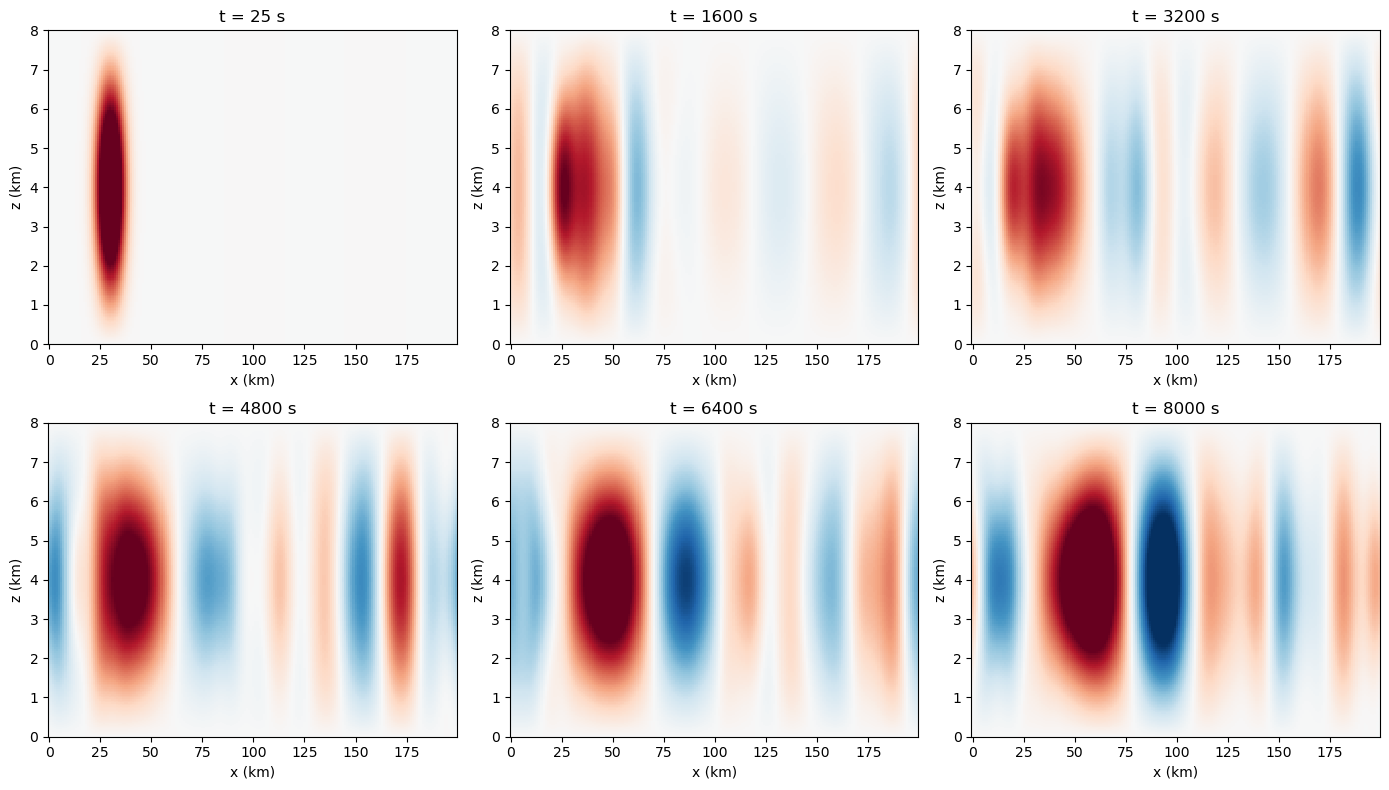

In [2]:
import numpy as np
import dedalus.public as de
import matplotlib.pyplot as plt

#model parameters for model size and discretization
xi, xf = 0, 200e3 #m
zi, zf = 0, 8e3 #m
nx, nz = 200, 200 #m

#model parameters
g = 9.8
T0 = 288
adiabatic_lapse_rate = 9.8 #C /km, thus the division by 1000 in N2
avg_temp_gradient = 6.5
N2 = g / T0 * abs(adiabatic_lapse_rate - avg_temp_gradient) / 1000
ubar = 5.0 #m/s
timestep = 1.0

#setting up boundary conditions
coords = de.CartesianCoordinates('x', 'z')
dist = de.Distributor(coords, dtype=np.float64)
xbasis = de.RealFourier(coords['x'], nx, bounds=(xi, xf)) #periodic boundary conditions
zbasis = de.Chebyshev(coords['z'], nz, bounds=(zi, zf)) #dirichlet boundary conditions, z = 0. this will be covered later too. 

#setting up the variables in the PDE
phi = dist.Field(name='phi', bases=(xbasis, zbasis))
q   = dist.Field(name='q', bases=(xbasis, zbasis))
w   = dist.Field(name='w', bases=(xbasis, zbasis))

#this is used for the dirichlet boundary conditions at z = 0 and z = max height
tau_w1 = dist.Field(name='tau_w1', bases=xbasis)
tau_w2 = dist.Field(name='tau_w2', bases=xbasis)
lift_basis = zbasis.derivative_basis(2)
lift = lambda A, n: de.Lift(A, lift_basis, n)

#problem setup
dx = lambda A: de.Differentiate(A, coords['x'])
dz = lambda A: de.Differentiate(A, coords['z'])

problem = de.IVP([phi, q, w, tau_w1, tau_w2], namespace={
    'phi': phi,
    'q': q,
    'w': w,
    'tau_w1': tau_w1,
    'tau_w2': tau_w2,
    'ubar': ubar,
    'N2': N2,
    'dx': dx,
    'dz': dz,
    'lift': lift,
    'zi': zi,
    'zf': zf
})

#equations
problem.add_equation("dt(phi) - q = 0")
problem.add_equation("dt(q) + 2*ubar*dx(q) + ubar**2*dx(dx(phi)) + N2*dx(dx(w)) = 0")
problem.add_equation("phi - dx(dx(w)) - dz(dz(w)) + lift(tau_w1, -1) + lift(tau_w2, -2) = 0")

problem.add_equation("w(z=zi) = 0")
problem.add_equation("w(z=zf) = 0")

solver = problem.build_solver(de.RK443)
solver.stop_sim_time = 8000 #tf

Lx, Lz = xf, zf

xg, zg = dist.local_grids(xbasis, zbasis)
# Perturbation on the left side, wider spread
x_center = xf * 0.15  # 15% from left edge
z_center = zf / 2     # Vertically centered
sigma_x = 5e3        # Wide in x (5 km)
sigma_z = 2e3         # "Tall" in z (2 km)

#sets up the gaussian initial condition perturbation
w['g'] = np.exp(-((xg - x_center)**2 / (2 * sigma_x**2) + 
                  (zg - z_center)**2 / (2 * sigma_z**2)))

w.change_scales(1)
phi_init = dx(dx(w)) + dz(dz(w))
phi_init.evaluate()

#more initial condition setup, this time for phi and q
phi['g'] = phi_init['g']

q['g'] = 0.0

#saving sim with snapshots so that I can make this into a video
save_every = 25
w_snapshots = []
times = []

x = xbasis.global_grid(dist, scale=1).flatten()
z = zbasis.global_grid(dist, scale=1).flatten()

#run simulation with saved snapshots
print("Running simulation...")
while solver.proceed:
    solver.step(timestep)
    
    if solver.iteration % save_every == 0:
        w.change_scales(1)
        w_snapshots.append(w['g'].copy())
        times.append(solver.sim_time)
        print(f"Saved snapshot at t = {solver.sim_time:.1f}")

print(f"Done! Saved {len(w_snapshots)} snapshots.")

X, Z = np.meshgrid(x, z, indexing='ij')

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

#plot results
indices = np.linspace(0, len(w_snapshots)-1, 6, dtype=int)

for ax, idx in zip(axes, indices):
    pcm = ax.pcolormesh(X/1e3, Z/1e3, w_snapshots[idx], 
                        shading='auto', cmap='RdBu_r',
                        vmin=-0.5, vmax=0.5)
    ax.set_title(f't = {times[idx]:.0f} s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('z (km)')

plt.tight_layout()
plt.savefig('gravity_wave_evolution.png', dpi=150)
plt.show()

Saving the resultant evolution as a gif. 

2025-12-02 11:08:55,059 matplotlib.animation 0/1 INFO :: Animation.save using <class 'matplotlib.animation.PillowWriter'>


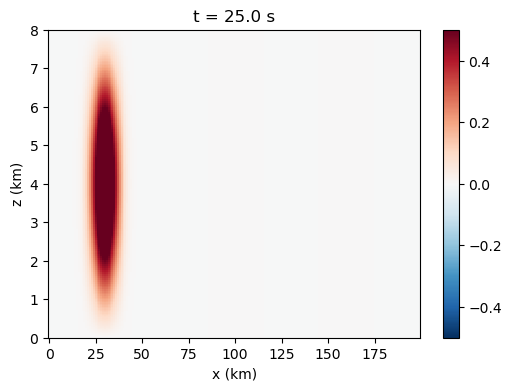

In [3]:
from matplotlib.animation import FuncAnimation, PillowWriter

#saving the video itself
fig, ax = plt.subplots(figsize=(6,4))
pcm = ax.pcolormesh(X/1e3, Z/1e3, w_snapshots[idx], 
                        shading='auto', cmap='RdBu_r',
                        vmin=-0.5, vmax=0.5)
ax.set_xlabel("x (km)")
ax.set_ylabel("z (km)")
fig.colorbar(pcm, ax=ax)

def update(i):
    pcm.set_array(w_snapshots[i].ravel())
    ax.set_title(f"t = {times[i]:.1f} s")
    return [pcm]

ani = FuncAnimation(fig, update, frames=len(w_snapshots), interval=50)

ani.save("gravity_wave_movie.gif", writer=PillowWriter(fps=20))

The system seems stable; we can also check max |w| for stability:

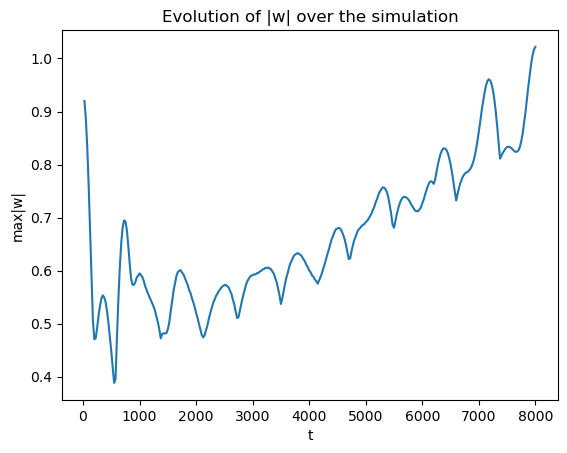

In [16]:
import numpy as np
maxw = [np.max(np.abs(snap)) for snap in w_snapshots]
plt.plot(times, maxw)
plt.xlabel('t')
plt.ylabel('max|w|')
plt.title('Evolution of |w| over the simulation')
plt.show()

The system still seems fairly stable. There is an increase in |w| over time, but this has likely got to do with the fact that $\bar{u}$ is contributing energy to the system and allowing the vertical velocity to amplify a bit. 

The resultant gravity waves are clearly visible with the alternating red and blue bands (vertical velocity displacement flips), and the initial displacement diffuses out to multiple "waves", eventually seeming to reach a quasi-steady-state of sorts, similar to the example given in the textbook (but with a different displacement direction): <br>
![Textbook image](textbook_im1.png)
<br>

Now let's tilt the input displacement (tilt the gaussian) and see the result. 

## Code Run Part 2: Tilted Start

2025-12-02 12:19:49,939 subsystems 0/1 INFO :: Building subproblem matrices 1/100 (~1%) Elapsed: 0s, Remaining: 24s, Rate: 4.2e+00/s
2025-12-02 12:19:50,008 subsystems 0/1 INFO :: Building subproblem matrices 10/100 (~10%) Elapsed: 0s, Remaining: 3s, Rate: 3.3e+01/s
2025-12-02 12:19:50,082 subsystems 0/1 INFO :: Building subproblem matrices 20/100 (~20%) Elapsed: 0s, Remaining: 2s, Rate: 5.2e+01/s
2025-12-02 12:19:50,160 subsystems 0/1 INFO :: Building subproblem matrices 30/100 (~30%) Elapsed: 0s, Remaining: 1s, Rate: 6.5e+01/s
2025-12-02 12:19:50,236 subsystems 0/1 INFO :: Building subproblem matrices 40/100 (~40%) Elapsed: 1s, Remaining: 1s, Rate: 7.5e+01/s
2025-12-02 12:19:50,315 subsystems 0/1 INFO :: Building subproblem matrices 50/100 (~50%) Elapsed: 1s, Remaining: 1s, Rate: 8.1e+01/s
2025-12-02 12:19:50,390 subsystems 0/1 INFO :: Building subproblem matrices 60/100 (~60%) Elapsed: 1s, Remaining: 0s, Rate: 8.7e+01/s
2025-12-02 12:19:50,462 subsystems 0/1 INFO :: Building subprob

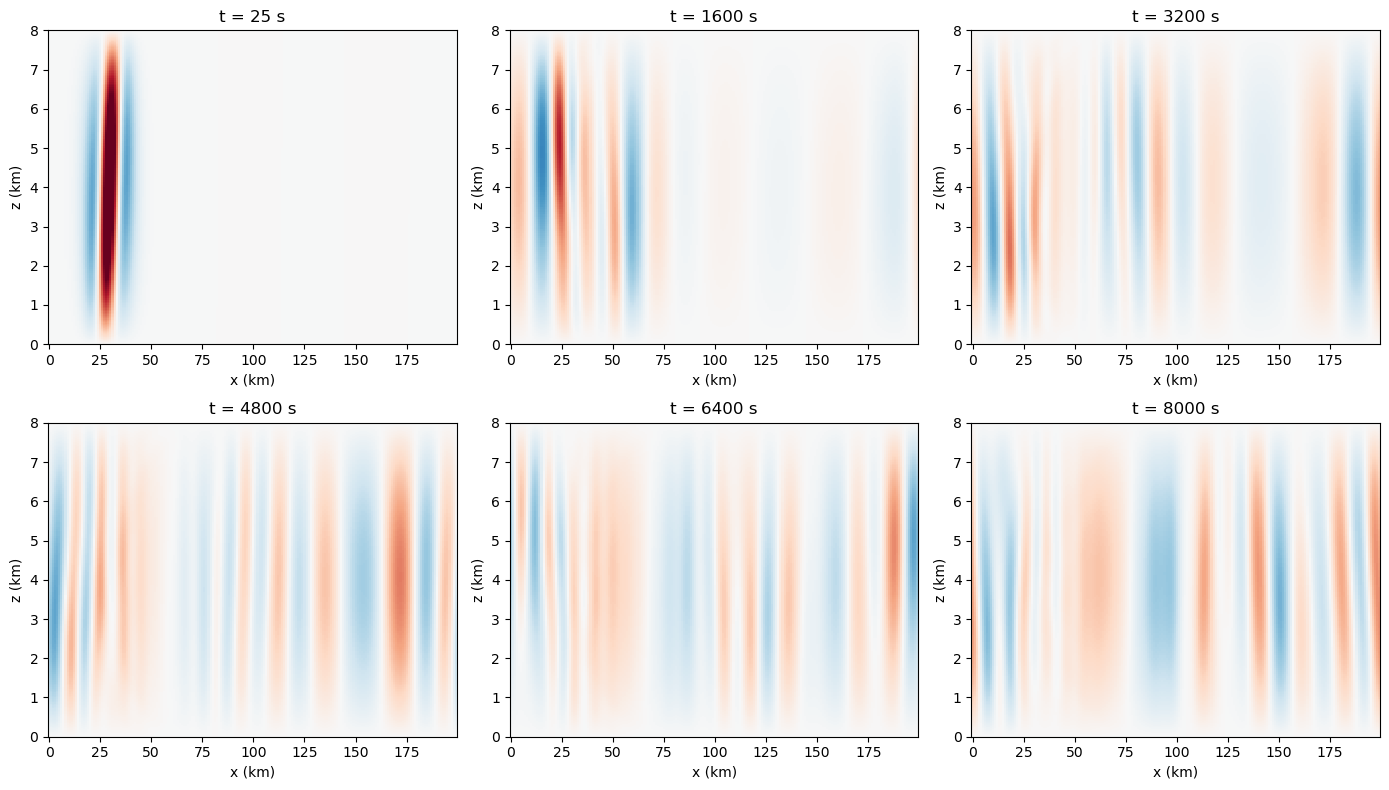

In [13]:
import numpy as np
import dedalus.public as de
import matplotlib.pyplot as plt
import imageio.v2 as imageio

xi, xf = 0, 200e3
zi, zf = 0, 8e3
nx, nz = 200, 200

g = 9.8
T0 = 288
adiabatic_lapse_rate = 9.8
avg_temp_gradient = 6.5
N2 = g / T0 * abs(adiabatic_lapse_rate - avg_temp_gradient) / 1000
ubar = 5.0
timestep = 1.0

coords = de.CartesianCoordinates('x', 'z')
dist = de.Distributor(coords, dtype=np.float64)
xbasis = de.RealFourier(coords['x'], nx, bounds=(xi, xf))
zbasis = de.Chebyshev(coords['z'], nz, bounds=(zi, zf))

phi = dist.Field(name='phi', bases=(xbasis, zbasis))
q   = dist.Field(name='q', bases=(xbasis, zbasis))
w   = dist.Field(name='w', bases=(xbasis, zbasis))

tau_w1 = dist.Field(name='tau_w1', bases=xbasis)
tau_w2 = dist.Field(name='tau_w2', bases=xbasis)

lift_basis = zbasis.derivative_basis(2)
lift = lambda A, n: de.Lift(A, lift_basis, n)

dx = lambda A: de.Differentiate(A, coords['x'])
dz = lambda A: de.Differentiate(A, coords['z'])

problem = de.IVP([phi, q, w, tau_w1, tau_w2], namespace={
    'phi': phi,
    'q': q,
    'w': w,
    'tau_w1': tau_w1,
    'tau_w2': tau_w2,
    'ubar': ubar,
    'N2': N2,
    'dx': dx,
    'dz': dz,
    'lift': lift,
    'zi': zi,
    'zf': zf
})

problem.add_equation("dt(phi) - q = 0")
problem.add_equation("dt(q) + 2*ubar*dx(q) + ubar**2*dx(dx(phi)) + N2*dx(dx(w)) = 0")
problem.add_equation("phi - dx(dx(w)) - dz(dz(w)) + lift(tau_w1, -1) + lift(tau_w2, -2) = 0")

problem.add_equation("w(z=zi) = 0")
problem.add_equation("w(z=zf) = 0")

solver = problem.build_solver(de.RK443)
solver.stop_sim_time = 8000

Lx, Lz = xf, zf

xg, zg = dist.local_grids(xbasis, zbasis)
# Perturbation on the left side, wider spread
x_center = xf * 0.15  # 15% from left edge (30 km)
z_center = zf * 0.6     # Vertically slightly above center

A = 1.8
theta = np.deg2rad(52)   # visible tilt
sigma_x = 18e3           # wide along rotated x-axis
sigma_z = 3e3            # narrow along rotated z-axis

v = xg - x_center
v2 = zg - z_center
x_rot =  v*np.cos(theta) + v2*np.sin(theta)
z_rot = -v*np.sin(theta) + v2*np.cos(theta)

#tilted gaussian ready
w['g'] = A * np.exp(-(x_rot**2/(2*sigma_x**2) + z_rot**2/(2*sigma_z**2)))


w.change_scales(1)
phi_init = dx(dx(w)) + dz(dz(w))
phi_init.evaluate()
phi['g'] = phi_init['g']

q['g'] = 0.0

save_every = 25
w_snapshots = []
times = []

x = xbasis.global_grid(dist, scale=1).flatten()
z = zbasis.global_grid(dist, scale=1).flatten()
print("Running simulation...")
while solver.proceed:
    solver.step(timestep)
    
    if solver.iteration % save_every == 0:
        w.change_scales(1)
        w_snapshots.append(w['g'].copy())
        times.append(solver.sim_time)
        print(f"Saved snapshot at t = {solver.sim_time:.1f}")

print(f"Done! Saved {len(w_snapshots)} snapshots.")

X, Z = np.meshgrid(x, z, indexing='ij')

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

indices = np.linspace(0, len(w_snapshots)-1, 6, dtype=int)

for ax, idx in zip(axes, indices):
    pcm = ax.pcolormesh(X/1e3, Z/1e3, w_snapshots[idx], 
                        shading='auto', cmap='RdBu_r',
                        vmin=-0.5, vmax=0.5)
    ax.set_title(f't = {times[idx]:.0f} s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('z (km)')

plt.tight_layout()
plt.savefig('gravity_wave_evolution_tilted.png', dpi=150)
plt.show()

2025-12-02 12:23:54,283 matplotlib.animation 0/1 INFO :: Animation.save using <class 'matplotlib.animation.PillowWriter'>


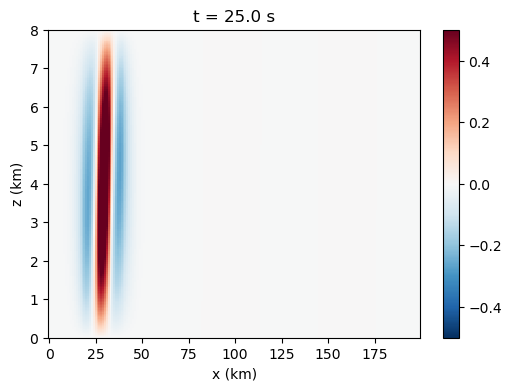

In [14]:
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(figsize=(6,4))
pcm = ax.pcolormesh(X/1e3, Z/1e3, w_snapshots[idx], 
                        shading='auto', cmap='RdBu_r',
                        vmin=-0.5, vmax=0.5)
ax.set_xlabel("x (km)")
ax.set_ylabel("z (km)")
fig.colorbar(pcm, ax=ax)

def update(i):
    pcm.set_array(w_snapshots[i].ravel())
    ax.set_title(f"t = {times[i]:.1f} s")
    return [pcm]

ani = FuncAnimation(fig, update, frames=len(w_snapshots), interval=50)

ani.save("gravity_wave_movie_tilted.gif", writer=PillowWriter(fps=20))

The system seems stable; we can also check max |w| for stability:

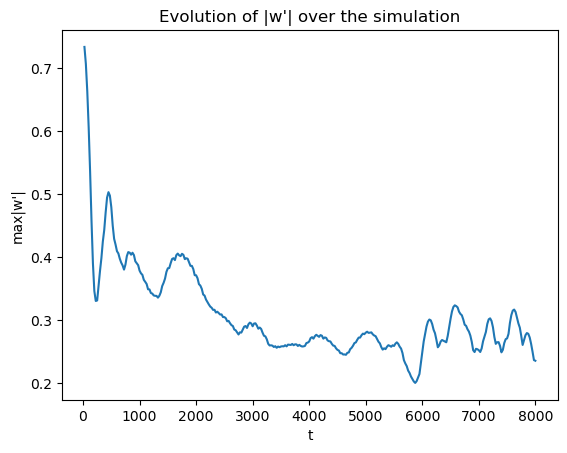

In [15]:
import numpy as np
maxw = [np.max(np.abs(snap)) for snap in w_snapshots]
plt.plot(times, maxw)
plt.xlabel('t')
plt.ylabel('max|w\'|')
plt.title('Evolution of |w\'| over the simulation')
plt.show()

The system is clearly stable despite the slight w'-spikes towards the end (possibly due to wave interactions and possibly due to u-bar energy contributions). 

With a tilted start, the behavior is weird - you get the same behavior as the previous case but slightly tilted, but then the air attempts to stratify, eventually with the alternating other bands appearing, but in a weird angle with chaotic behavior near the original displacement. The tilt on the graph is deceptive since x goes to 200 km, but z only goes to 8 km, so there is a fairly notable amount of tilt through most of the simulation. Interestingly, due to the propagation of the waves, the overall tilt of vertical velocity displacement, as well as the vertical velocity displacement magnitude itself generally tends to be a bit more chaotic (again, this is a bit deceptive in the image itself). The overall result still seems closer to the intended result, so we will assume a tilted start from here on out. 

## Code Run Part 3: Tilted Start, Low Background Velocity

This is the same as part 2 but the background x-velocity $\bar{u}$ is slower, which slows down wave propagation. 

2025-12-02 12:26:41,252 subsystems 0/1 INFO :: Building subproblem matrices 1/100 (~1%) Elapsed: 0s, Remaining: 1s, Rate: 7.0e+01/s
2025-12-02 12:26:41,323 subsystems 0/1 INFO :: Building subproblem matrices 10/100 (~10%) Elapsed: 0s, Remaining: 1s, Rate: 1.2e+02/s
2025-12-02 12:26:41,402 subsystems 0/1 INFO :: Building subproblem matrices 20/100 (~20%) Elapsed: 0s, Remaining: 1s, Rate: 1.2e+02/s
2025-12-02 12:26:41,518 subsystems 0/1 INFO :: Building subproblem matrices 30/100 (~30%) Elapsed: 0s, Remaining: 1s, Rate: 1.1e+02/s
2025-12-02 12:26:41,599 subsystems 0/1 INFO :: Building subproblem matrices 40/100 (~40%) Elapsed: 0s, Remaining: 1s, Rate: 1.1e+02/s
2025-12-02 12:26:41,677 subsystems 0/1 INFO :: Building subproblem matrices 50/100 (~50%) Elapsed: 0s, Remaining: 0s, Rate: 1.1e+02/s
2025-12-02 12:26:41,752 subsystems 0/1 INFO :: Building subproblem matrices 60/100 (~60%) Elapsed: 1s, Remaining: 0s, Rate: 1.2e+02/s
2025-12-02 12:26:41,829 subsystems 0/1 INFO :: Building subprobl

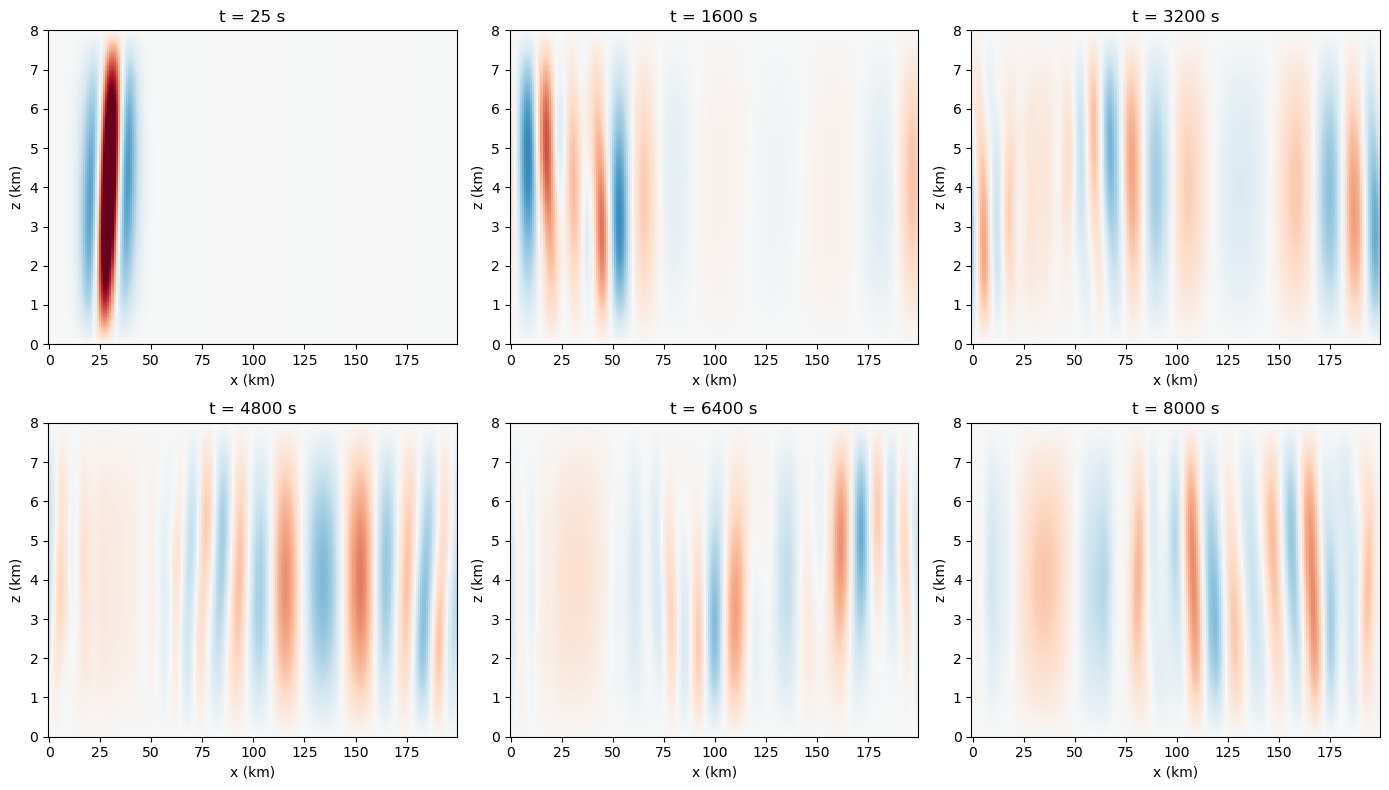

In [17]:
import numpy as np
import dedalus.public as de
import matplotlib.pyplot as plt
import imageio.v2 as imageio

xi, xf = 0, 200e3
zi, zf = 0, 8e3
nx, nz = 200, 200

g = 9.8
T0 = 288
adiabatic_lapse_rate = 9.8
avg_temp_gradient = 6.5
N2 = g / T0 * abs(adiabatic_lapse_rate - avg_temp_gradient) / 1000
ubar = 1.0
timestep = 1.0

coords = de.CartesianCoordinates('x', 'z')
dist = de.Distributor(coords, dtype=np.float64)
xbasis = de.RealFourier(coords['x'], nx, bounds=(xi, xf))
zbasis = de.Chebyshev(coords['z'], nz, bounds=(zi, zf))

phi = dist.Field(name='phi', bases=(xbasis, zbasis))
q   = dist.Field(name='q', bases=(xbasis, zbasis))
w   = dist.Field(name='w', bases=(xbasis, zbasis))

tau_w1 = dist.Field(name='tau_w1', bases=xbasis)
tau_w2 = dist.Field(name='tau_w2', bases=xbasis)

lift_basis = zbasis.derivative_basis(2)
lift = lambda A, n: de.Lift(A, lift_basis, n)

dx = lambda A: de.Differentiate(A, coords['x'])
dz = lambda A: de.Differentiate(A, coords['z'])

problem = de.IVP([phi, q, w, tau_w1, tau_w2], namespace={
    'phi': phi,
    'q': q,
    'w': w,
    'tau_w1': tau_w1,
    'tau_w2': tau_w2,
    'ubar': ubar,
    'N2': N2,
    'dx': dx,
    'dz': dz,
    'lift': lift,
    'zi': zi,
    'zf': zf
})

problem.add_equation("dt(phi) - q = 0")
problem.add_equation("dt(q) + 2*ubar*dx(q) + ubar**2*dx(dx(phi)) + N2*dx(dx(w)) = 0")
problem.add_equation("phi - dx(dx(w)) - dz(dz(w)) + lift(tau_w1, -1) + lift(tau_w2, -2) = 0")

problem.add_equation("w(z=zi) = 0")
problem.add_equation("w(z=zf) = 0")

solver = problem.build_solver(de.RK443)
solver.stop_sim_time = 8000

Lx, Lz = xf, zf

xg, zg = dist.local_grids(xbasis, zbasis)
# Perturbation on the left side, wider spread
x_center = xf * 0.15  # 15% from left edge (30 km)
z_center = zf * 0.6     # Vertically centered (10 km)

A = 1.8
theta = np.deg2rad(45)   # visible tilt
sigma_x = 18e3           # wide along rotated x-axis
sigma_z = 3e3            # narrow along rotated z-axis

v = xg - x_center
v2 = zg - z_center
x_rot =  v*np.cos(theta) + v2*np.sin(theta)
z_rot = -v*np.sin(theta) + v2*np.cos(theta)

w['g'] = A * np.exp(-(x_rot**2/(2*sigma_x**2) + z_rot**2/(2*sigma_z**2)))


w.change_scales(1)
phi_init = dx(dx(w)) + dz(dz(w))
phi_init.evaluate()
phi['g'] = phi_init['g']

q['g'] = 0.0

save_every = 25
w_snapshots = []
times = []

x = xbasis.global_grid(dist, scale=1).flatten()
z = zbasis.global_grid(dist, scale=1).flatten()
print("Running simulation...")
while solver.proceed:
    solver.step(timestep)
    
    if solver.iteration % save_every == 0:
        w.change_scales(1)
        w_snapshots.append(w['g'].copy())
        times.append(solver.sim_time)
        print(f"Saved snapshot at t = {solver.sim_time:.1f}")

print(f"Done! Saved {len(w_snapshots)} snapshots.")

X, Z = np.meshgrid(x, z, indexing='ij')

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

indices = np.linspace(0, len(w_snapshots)-1, 6, dtype=int)

for ax, idx in zip(axes, indices):
    pcm = ax.pcolormesh(X/1e3, Z/1e3, w_snapshots[idx], 
                        shading='auto', cmap='RdBu_r',
                        vmin=-0.5, vmax=0.5)
    ax.set_title(f't = {times[idx]:.0f} s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('z (km)')

plt.tight_layout()
plt.savefig('gravity_wave_evolution_tilted_low_u.png', dpi=150)
plt.show()

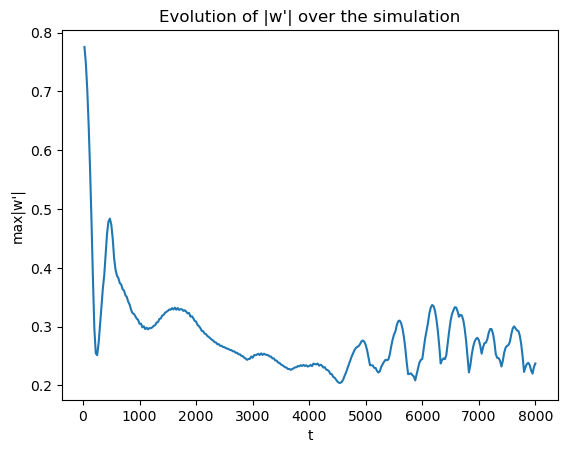

In [18]:
import numpy as np
maxw = [np.max(np.abs(snap)) for snap in w_snapshots]
plt.plot(times, maxw)
plt.xlabel('t')
plt.ylabel('max|w\'|')
plt.title('Evolution of |w\'| over the simulation')
plt.show()

The system seems a lot more stabilized this time with alternating bands of lower magnitude and a lower max |w'| - this makes sense because the background wind is no longer contributing as much energy to the system. Rather interestingly, there also seems to be more bands in general (not by much but I do see a difference) - I theorize this is due to potential constructive wave interference in the case of higher $\bar{u}$, as the larger bands develop over time. This could conceivably happen given a higher background wind speed allowing for faster propagation but is very difficult to actually test, especially given the limited amount of time there in this project. 

## Code Run Part 4: Timestep Changes

2025-12-02 13:35:55,112 subsystems 0/1 INFO :: Building subproblem matrices 1/100 (~1%) Elapsed: 0s, Remaining: 3s, Rate: 3.6e+01/s
2025-12-02 13:35:55,212 subsystems 0/1 INFO :: Building subproblem matrices 10/100 (~10%) Elapsed: 0s, Remaining: 1s, Rate: 7.8e+01/s
2025-12-02 13:35:55,321 subsystems 0/1 INFO :: Building subproblem matrices 20/100 (~20%) Elapsed: 0s, Remaining: 1s, Rate: 8.4e+01/s
2025-12-02 13:35:55,432 subsystems 0/1 INFO :: Building subproblem matrices 30/100 (~30%) Elapsed: 0s, Remaining: 1s, Rate: 8.6e+01/s
2025-12-02 13:35:55,548 subsystems 0/1 INFO :: Building subproblem matrices 40/100 (~40%) Elapsed: 0s, Remaining: 1s, Rate: 8.6e+01/s
2025-12-02 13:35:55,658 subsystems 0/1 INFO :: Building subproblem matrices 50/100 (~50%) Elapsed: 1s, Remaining: 1s, Rate: 8.7e+01/s
2025-12-02 13:35:55,761 subsystems 0/1 INFO :: Building subproblem matrices 60/100 (~60%) Elapsed: 1s, Remaining: 0s, Rate: 8.9e+01/s
2025-12-02 13:35:55,867 subsystems 0/1 INFO :: Building subprobl

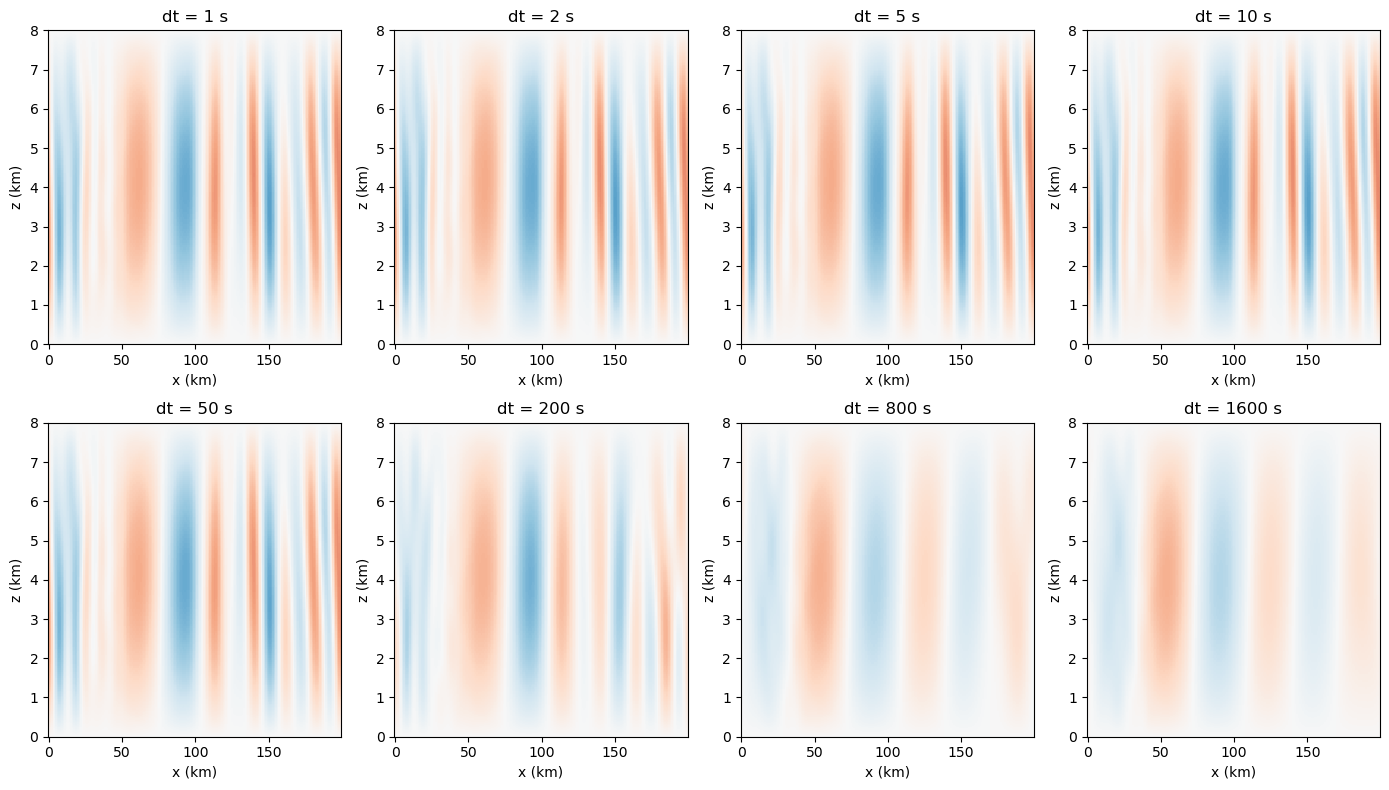

In [19]:
import numpy as np
import dedalus.public as de
import matplotlib.pyplot as plt
import imageio.v2 as imageio

xi, xf = 0, 200e3
zi, zf = 0, 8e3
nx, nz = 200, 200
w_snapshots = []
g = 9.8
T0 = 288
adiabatic_lapse_rate = 9.8
avg_temp_gradient = 6.5
N2 = g / T0 * abs(adiabatic_lapse_rate - avg_temp_gradient) / 1000
ubar = 5.0
timesteps = [1, 2, 5, 10, 50, 200, 800, 1600]
for timestep in timesteps:

    coords = de.CartesianCoordinates('x', 'z')
    dist = de.Distributor(coords, dtype=np.float64)
    xbasis = de.RealFourier(coords['x'], nx, bounds=(xi, xf))
    zbasis = de.Chebyshev(coords['z'], nz, bounds=(zi, zf))

    phi = dist.Field(name='phi', bases=(xbasis, zbasis))
    q   = dist.Field(name='q', bases=(xbasis, zbasis))
    w   = dist.Field(name='w', bases=(xbasis, zbasis))

    tau_w1 = dist.Field(name='tau_w1', bases=xbasis)
    tau_w2 = dist.Field(name='tau_w2', bases=xbasis)

    lift_basis = zbasis.derivative_basis(2)
    lift = lambda A, n: de.Lift(A, lift_basis, n)

    dx = lambda A: de.Differentiate(A, coords['x'])
    dz = lambda A: de.Differentiate(A, coords['z'])

    problem = de.IVP([phi, q, w, tau_w1, tau_w2], namespace={
        'phi': phi,
        'q': q,
        'w': w,
        'tau_w1': tau_w1,
        'tau_w2': tau_w2,
        'ubar': ubar,
        'N2': N2,
        'dx': dx,
        'dz': dz,
        'lift': lift,
        'zi': zi,
        'zf': zf
    })

    problem.add_equation("dt(phi) - q = 0")
    problem.add_equation("dt(q) + 2*ubar*dx(q) + ubar**2*dx(dx(phi)) + N2*dx(dx(w)) = 0")
    problem.add_equation("phi - dx(dx(w)) - dz(dz(w)) + lift(tau_w1, -1) + lift(tau_w2, -2) = 0")

    problem.add_equation("w(z=zi) = 0")
    problem.add_equation("w(z=zf) = 0")

    solver = problem.build_solver(de.RK443)
    solver.stop_sim_time = 8000

    Lx, Lz = xf, zf

    xg, zg = dist.local_grids(xbasis, zbasis)
    # Perturbation on the left side, wider spread
    x_center = xf * 0.15  # 15% from left edge (30 km)
    z_center = zf * 0.6     # Vertically centered (10 km)
    sigma_x = 5e3        # Wide in x (5 km)
    sigma_z = 5e3         # Tall in z (5 km)

    A = 1.8
    theta = np.deg2rad(45)   # visible tilt
    sigma_x = 18e3           # wide along rotated x-axis
    sigma_z = 3e3            # narrow along rotated z-axis

    v = xg - x_center
    v2 = zg - z_center
    x_rot =  v*np.cos(theta) + v2*np.sin(theta)
    z_rot = -v*np.sin(theta) + v2*np.cos(theta)

    w['g'] = A * np.exp(-(x_rot**2/(2*sigma_x**2) + z_rot**2/(2*sigma_z**2)))


    w.change_scales(1)
    phi_init = dx(dx(w)) + dz(dz(w))
    phi_init.evaluate()
    phi['g'] = phi_init['g']

    q['g'] = 0.0

    save_every = None
    
    times = []

    x = xbasis.global_grid(dist, scale=1).flatten()
    z = zbasis.global_grid(dist, scale=1).flatten()
    print("Running simulation...")
    while solver.proceed:
        solver.step(timestep)
        
        if solver.sim_time >= 8000:
            w.change_scales(1)
            w_snapshots.append(w['g'].copy())
            times.append(solver.sim_time)
            print(f"Saved snapshot at t = {solver.sim_time:.1f}")

    print(f"Done! Saved {len(w_snapshots)} snapshots.")

X, Z = np.meshgrid(x, z, indexing='ij')

fig, axes = plt.subplots(2, 4, figsize=(14, 8))
axes = axes.flatten()

indices = np.linspace(0, len(timesteps)-1, len(timesteps), dtype=int)

for ax, idx in zip(axes, indices):
    pcm = ax.pcolormesh(X/1e3, Z/1e3, w_snapshots[idx], 
                        shading='auto', cmap='RdBu_r',
                        vmin=-0.5, vmax=0.5)
    ax.set_title(f'dt = {timesteps[idx]:.0f} s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('z (km)')

plt.tight_layout()
plt.savefig('gravity_wave_evolution_timesteps.png', dpi=150)
plt.show()

Above is a graph of the final states of each simulation run. 
Now this is interesting. With low timestep value, you get similar behavior, but as you reach higher timestep values, the inaccuracies start piling up and eventually result in straight-line banding, losing the complex structure that was originally there. In fact, if we run a high timestep over the long-term:

2025-12-02 14:05:20,643 subsystems 0/1 INFO :: Building subproblem matrices 1/100 (~1%) Elapsed: 0s, Remaining: 1s, Rate: 8.1e+01/s
2025-12-02 14:05:20,705 subsystems 0/1 INFO :: Building subproblem matrices 10/100 (~10%) Elapsed: 0s, Remaining: 1s, Rate: 1.3e+02/s
2025-12-02 14:05:20,788 subsystems 0/1 INFO :: Building subproblem matrices 20/100 (~20%) Elapsed: 0s, Remaining: 1s, Rate: 1.3e+02/s
2025-12-02 14:05:20,862 subsystems 0/1 INFO :: Building subproblem matrices 30/100 (~30%) Elapsed: 0s, Remaining: 1s, Rate: 1.3e+02/s
2025-12-02 14:05:20,935 subsystems 0/1 INFO :: Building subproblem matrices 40/100 (~40%) Elapsed: 0s, Remaining: 0s, Rate: 1.3e+02/s
2025-12-02 14:05:21,006 subsystems 0/1 INFO :: Building subproblem matrices 50/100 (~50%) Elapsed: 0s, Remaining: 0s, Rate: 1.3e+02/s
2025-12-02 14:05:21,117 subsystems 0/1 INFO :: Building subproblem matrices 60/100 (~60%) Elapsed: 0s, Remaining: 0s, Rate: 1.2e+02/s
2025-12-02 14:05:21,185 subsystems 0/1 INFO :: Building subprobl

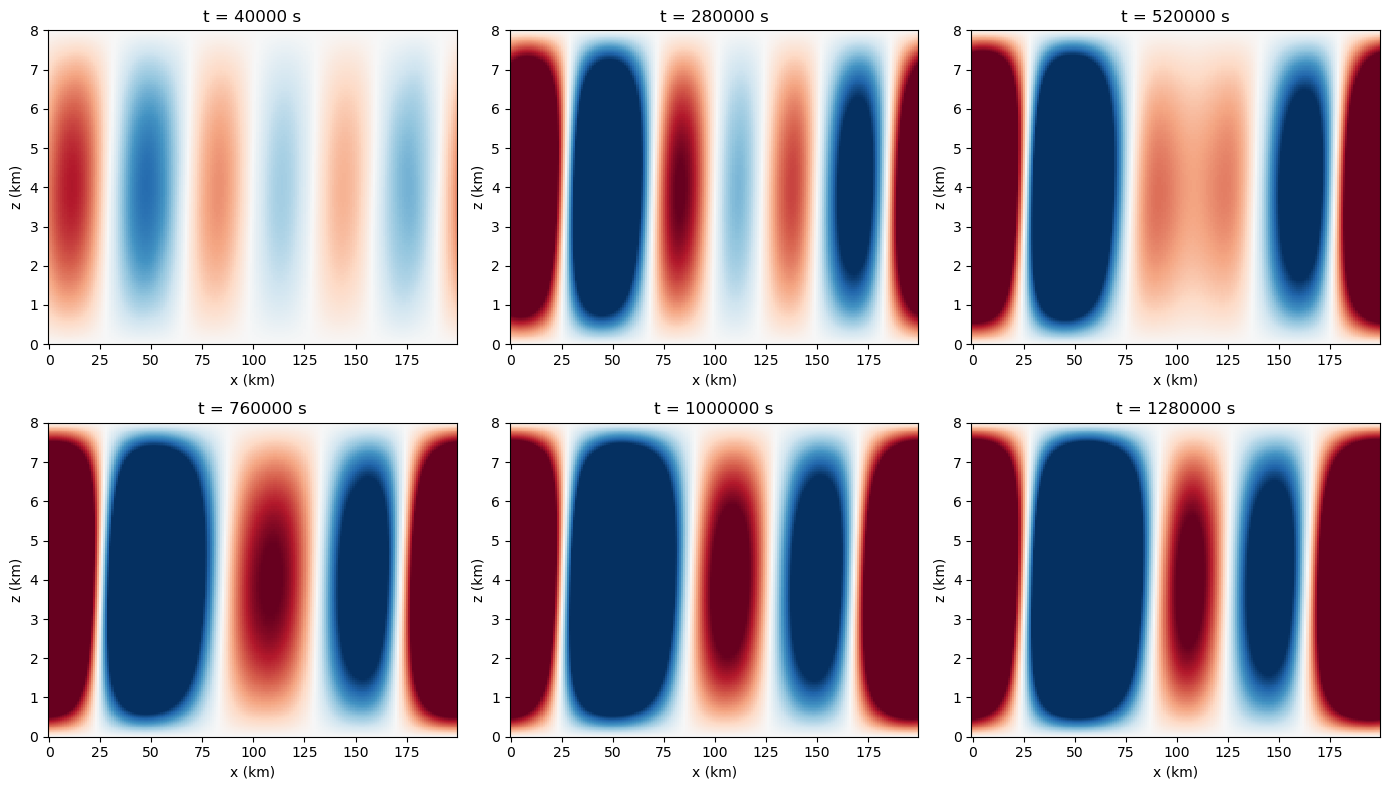

In [20]:
import numpy as np
import dedalus.public as de
import matplotlib.pyplot as plt
import imageio.v2 as imageio

xi, xf = 0, 200e3
zi, zf = 0, 8e3
nx, nz = 200, 200

g = 9.8
T0 = 288
adiabatic_lapse_rate = 9.8
avg_temp_gradient = 6.5
N2 = g / T0 * abs(adiabatic_lapse_rate - avg_temp_gradient) / 1000
ubar = 5.0
timestep = 1600.0

coords = de.CartesianCoordinates('x', 'z')
dist = de.Distributor(coords, dtype=np.float64)
xbasis = de.RealFourier(coords['x'], nx, bounds=(xi, xf))
zbasis = de.Chebyshev(coords['z'], nz, bounds=(zi, zf))

phi = dist.Field(name='phi', bases=(xbasis, zbasis))
q   = dist.Field(name='q', bases=(xbasis, zbasis))
w   = dist.Field(name='w', bases=(xbasis, zbasis))

tau_w1 = dist.Field(name='tau_w1', bases=xbasis)
tau_w2 = dist.Field(name='tau_w2', bases=xbasis)

lift_basis = zbasis.derivative_basis(2)
lift = lambda A, n: de.Lift(A, lift_basis, n)

dx = lambda A: de.Differentiate(A, coords['x'])
dz = lambda A: de.Differentiate(A, coords['z'])

problem = de.IVP([phi, q, w, tau_w1, tau_w2], namespace={
    'phi': phi,
    'q': q,
    'w': w,
    'tau_w1': tau_w1,
    'tau_w2': tau_w2,
    'ubar': ubar,
    'N2': N2,
    'dx': dx,
    'dz': dz,
    'lift': lift,
    'zi': zi,
    'zf': zf
})

problem.add_equation("dt(phi) - q = 0")
problem.add_equation("dt(q) + 2*ubar*dx(q) + ubar**2*dx(dx(phi)) + N2*dx(dx(w)) = 0")
problem.add_equation("phi - dx(dx(w)) - dz(dz(w)) + lift(tau_w1, -1) + lift(tau_w2, -2) = 0")

problem.add_equation("w(z=zi) = 0")
problem.add_equation("w(z=zf) = 0")

solver = problem.build_solver(de.RK443)
solver.stop_sim_time = 1280000

Lx, Lz = xf, zf

xg, zg = dist.local_grids(xbasis, zbasis)
# Perturbation on the left side, wider spread
x_center = xf * 0.15  # 15% from left edge (30 km)
z_center = zf * 0.6     # Vertically centered (10 km)
sigma_x = 5e3        # Wide in x (5 km)
sigma_z = 5e3         # Tall in z (5 km)

A = 1.0
theta = np.deg2rad(45)   # visible tilt
sigma_x = 18e3           # wide along rotated x-axis
sigma_z = 3e3            # narrow along rotated z-axis

v = xg - x_center
v2 = zg - z_center
x_rot =  v*np.cos(theta) + v2*np.sin(theta)
z_rot = -v*np.sin(theta) + v2*np.cos(theta)

w['g'] = A * np.exp(-(x_rot**2/(2*sigma_x**2) + z_rot**2/(2*sigma_z**2)))


w.change_scales(1)
phi_init = dx(dx(w)) + dz(dz(w))
phi_init.evaluate()
phi['g'] = phi_init['g']

q['g'] = 0.0

save_every = 25
w_snapshots = []
times = []

x = xbasis.global_grid(dist, scale=1).flatten()
z = zbasis.global_grid(dist, scale=1).flatten()
print("Running simulation...")
while solver.proceed:
    solver.step(timestep)
    
    if solver.iteration % save_every == 0:
        w.change_scales(1)
        w_snapshots.append(w['g'].copy())
        times.append(solver.sim_time)
        print(f"Saved snapshot at t = {solver.sim_time:.1f}")

print(f"Done! Saved {len(w_snapshots)} snapshots.")

X, Z = np.meshgrid(x, z, indexing='ij')

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

indices = np.linspace(0, len(w_snapshots)-1, 6, dtype=int)

for ax, idx in zip(axes, indices):
    pcm = ax.pcolormesh(X/1e3, Z/1e3, w_snapshots[idx], 
                        shading='auto', cmap='RdBu_r',
                        vmin=-0.5, vmax=0.5)
    ax.set_title(f't = {times[idx]:.0f} s')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('z (km)')

plt.tight_layout()
plt.savefig('gravity_wave_evolution_tilted_hightimestep.png', dpi=150)
plt.show()

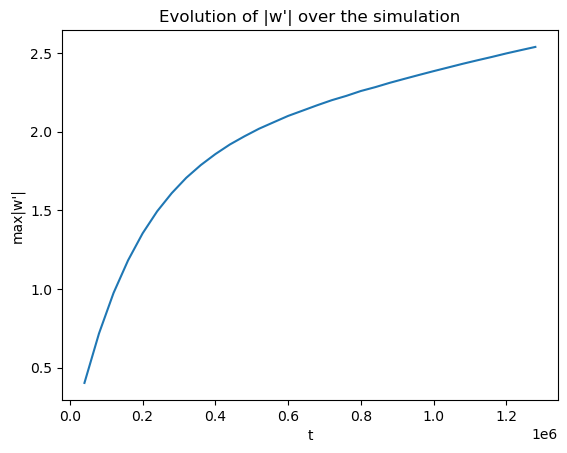

In [21]:
import numpy as np
maxw = [np.max(np.abs(snap)) for snap in w_snapshots]
plt.plot(times, maxw)
plt.xlabel('t')
plt.ylabel('max|w\'|')
plt.title('Evolution of |w\'| over the simulation')
plt.show()

There is seemingly a loss of some stability, as |w'| exceeds 6 times its original value by the end of the simulation in the long-term and the airmasses turn into misshapen blobs with unrealistically quick transitions. Unfortunately, trying to run the same code with 1-second timesteps will take an unrealistic amount of time (in the scale of this project) - however, as visible here, despite really large timesteps, there isn't all that much of a loss in stability, and despite |w'| reaching a large value, it's not increasing exponentially yet. This could also be due to the RK443 scheme being a higher-order scheme that likely is more stable for that reason, and thus has different stability conditions (especially given the fact that this is a different system from the original advection equation despite having a quasi-advective term $\left( \frac{\partial}{\partial t} + \bar{u}\,\frac{\partial}{\partial x} \right)^2$). 

## Code Run Part 5: Buoyancy Frequency Changes

Now we're testing how changing the buoyancy frequency of the atmosphere affects the overall gravity waves. We assume a base value of ~0.00011 (similar to what we had before) and try a few values surrounding it. 

In [22]:
import numpy as np
import dedalus.public as de
import matplotlib.pyplot as plt
import imageio.v2 as imageio

xi, xf = 0, 200e3
zi, zf = 0, 8e3
nx, nz = 200, 200
w_snapshots = []
g = 9.8
T0 = 288
adiabatic_lapse_rate = 9.8
avg_temp_gradient = 6.5
N2 = g / T0 * abs(adiabatic_lapse_rate - avg_temp_gradient) / 1000
timestep = 1.0
ubar = 5.0
N2s = [0.00011/2, 0.00011, 0.00011 * 2, 0.00011 * 5]
for N2 in N2s:

    coords = de.CartesianCoordinates('x', 'z')
    dist = de.Distributor(coords, dtype=np.float64)
    xbasis = de.RealFourier(coords['x'], nx, bounds=(xi, xf))
    zbasis = de.Chebyshev(coords['z'], nz, bounds=(zi, zf))

    phi = dist.Field(name='phi', bases=(xbasis, zbasis))
    q   = dist.Field(name='q', bases=(xbasis, zbasis))
    w   = dist.Field(name='w', bases=(xbasis, zbasis))

    tau_w1 = dist.Field(name='tau_w1', bases=xbasis)
    tau_w2 = dist.Field(name='tau_w2', bases=xbasis)

    lift_basis = zbasis.derivative_basis(2)
    lift = lambda A, n: de.Lift(A, lift_basis, n)

    dx = lambda A: de.Differentiate(A, coords['x'])
    dz = lambda A: de.Differentiate(A, coords['z'])

    problem = de.IVP([phi, q, w, tau_w1, tau_w2], namespace={
        'phi': phi,
        'q': q,
        'w': w,
        'tau_w1': tau_w1,
        'tau_w2': tau_w2,
        'ubar': ubar,
        'N2': N2,
        'dx': dx,
        'dz': dz,
        'lift': lift,
        'zi': zi,
        'zf': zf
    })

    problem.add_equation("dt(phi) - q = 0")
    problem.add_equation("dt(q) + 2*ubar*dx(q) + ubar**2*dx(dx(phi)) + N2*dx(dx(w)) = 0")
    problem.add_equation("phi - dx(dx(w)) - dz(dz(w)) + lift(tau_w1, -1) + lift(tau_w2, -2) = 0")

    problem.add_equation("w(z=zi) = 0")
    problem.add_equation("w(z=zf) = 0")

    solver = problem.build_solver(de.RK443)
    solver.stop_sim_time = 8000

    Lx, Lz = xf, zf

    xg, zg = dist.local_grids(xbasis, zbasis)
    # Perturbation on the left side, wider spread
    x_center = xf * 0.15  # 15% from left edge (30 km)
    z_center = zf * 0.6     # Vertically centered (10 km)
    sigma_x = 5e3        # Wide in x (5 km)
    sigma_z = 5e3         # Tall in z (5 km)

    A = 1.0
    theta = np.deg2rad(45)   # visible tilt
    sigma_x = 18e3           # wide along rotated x-axis
    sigma_z = 3e3            # narrow along rotated z-axis

    v = xg - x_center
    v2 = zg - z_center
    x_rot =  v*np.cos(theta) + v2*np.sin(theta)
    z_rot = -v*np.sin(theta) + v2*np.cos(theta)

    w['g'] = A * np.exp(-(x_rot**2/(2*sigma_x**2) + z_rot**2/(2*sigma_z**2)))


    w.change_scales(1)
    phi_init = dx(dx(w)) + dz(dz(w))
    phi_init.evaluate()
    phi['g'] = phi_init['g']

    q['g'] = 0.0

    save_every = None
    
    times = []

    x = xbasis.global_grid(dist, scale=1).flatten()
    z = zbasis.global_grid(dist, scale=1).flatten()
    print("Running simulation...")
    while solver.proceed:
        solver.step(timestep)
        
        if solver.sim_time >= 8000:
            w.change_scales(1)
            w_snapshots.append(w['g'].copy())
            times.append(solver.sim_time)
            print(f"Saved snapshot at t = {solver.sim_time:.1f}")

    print(f"Done! Saved {len(w_snapshots)} snapshots.")


2025-12-02 14:05:44,229 subsystems 0/1 INFO :: Building subproblem matrices 1/100 (~1%) Elapsed: 0s, Remaining: 1s, Rate: 8.3e+01/s
2025-12-02 14:05:44,291 subsystems 0/1 INFO :: Building subproblem matrices 10/100 (~10%) Elapsed: 0s, Remaining: 1s, Rate: 1.3e+02/s
2025-12-02 14:05:44,360 subsystems 0/1 INFO :: Building subproblem matrices 20/100 (~20%) Elapsed: 0s, Remaining: 1s, Rate: 1.4e+02/s
2025-12-02 14:05:44,430 subsystems 0/1 INFO :: Building subproblem matrices 30/100 (~30%) Elapsed: 0s, Remaining: 0s, Rate: 1.4e+02/s
2025-12-02 14:05:44,499 subsystems 0/1 INFO :: Building subproblem matrices 40/100 (~40%) Elapsed: 0s, Remaining: 0s, Rate: 1.4e+02/s
2025-12-02 14:05:44,567 subsystems 0/1 INFO :: Building subproblem matrices 50/100 (~50%) Elapsed: 0s, Remaining: 0s, Rate: 1.4e+02/s
2025-12-02 14:05:44,636 subsystems 0/1 INFO :: Building subproblem matrices 60/100 (~60%) Elapsed: 0s, Remaining: 0s, Rate: 1.4e+02/s
2025-12-02 14:05:44,704 subsystems 0/1 INFO :: Building subprobl

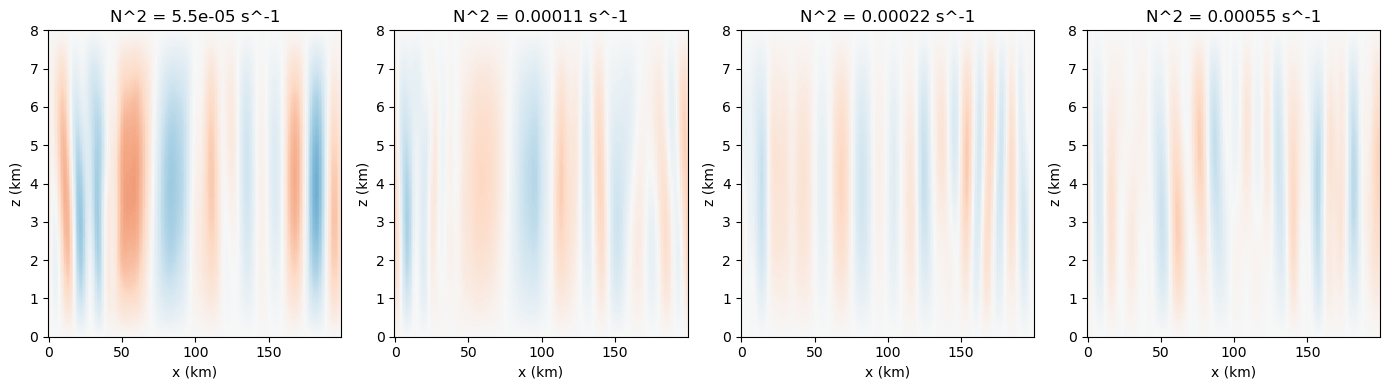

In [23]:
X, Z = np.meshgrid(x, z, indexing='ij')

fig, axes = plt.subplots(1, 4, figsize=(14, 4))
axes = axes.flatten()

indices = np.linspace(0, len(timesteps)-1, len(timesteps), dtype=int)

for ax, idx in zip(axes, indices):
    pcm = ax.pcolormesh(X/1e3, Z/1e3, w_snapshots[idx], 
                        shading='auto', cmap='RdBu_r',
                        vmin=-0.5, vmax=0.5)
    ax.set_title(f'N^2 = {N2s[idx]} s^-1')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('z (km)')

plt.tight_layout()
plt.savefig('gravity_wave_evolution_n2.png', dpi=150)
plt.show()

The <a href= "https://www.gfdl.noaa.gov/wp-content/uploads/files/user_files/stg/ch_3.pdf"> buoyancy frequency </a> affects how quickly waves propagate as well, but what it mainly does is determine the oscillation frequency of a vertically-displaced air parcel in the atmosphere. Thus, by increasing buoyancy frequency, the number of bands of vertical displacement (ie. the number of oscillations) should increase, which is, in fact, what we see here - the lowest-frequency simulation has 8-10 individual bands stretching about 15-20 km each, while the highest-frequnecy simulation has 17-20 individual bands in a more chaotic formation stretching about 5-10 km each. 

## Conclusion

While the simulation was limited compared to more complex papers, the results were similar to what was expected - alternating bands of vertical velocity as a result of the original displacmeent that propagated across the domain over time. While the simulation did run for a while, it wasn't able to get to a perfect steady state due to computing constraints - however, even without that, we can clearly see that the intended gravity wave behavior is occurring. Due to the domain being smaller than the real Earth, the gravity waves only encompassed a 10-20 km per wave at most. While small gravity waves do occur, larger mesoscale gravity waves are also a phenomenon (Achatz et. al, 2024), which means that the simulation would likely change with a larger domain, but would be more complex and take longer to simulate with a similar resolution as the current domain. 

Outside of that, the other major factor that this paper looked at was topography. Topography forces air upward or downward, which affects the displacement and vertical velocity of the parcel. That will be covered in the next section of the paper (MATLAB), which uses equation 7.46 from the same aforementioned textbook to come up with a time-independent steady state for gravity waves over topography such as mountains. 
(Nicolas_Miranda_Final_Project.mlx)

# References

Achatz, U., Alexander, M. J., Becker, E., Chun, H.-Y., Dörnbrack, A., Holt, L. A., Plougonven, R., Polichtchouk, I., Sato, K., Seshadri, A., Stephan, C., van Niekerk, A., & Wright, C. (2024). Atmospheric Gravity Waves: Processes and Parameterization. Journal of the Atmospheric Sciences, 81(2), 237–262. https://doi.org/10.1175/JAS-D-23-0210.1 <br> <br>
Holton, J. R. (1979). Chapter 7: Atmospheric oscillations—Linear perturbation theory. In J. R. Holton (Ed.), International Geophysics (Vol. 23, pp. 146–172). Academic Press. https://doi.org/10.1016/S0074-6142(08)60523-9 <br> <br>
Linden, P. F. (n.d.). Chapter 3.04. In MAE course notes. University of California, San Diego. Retrieved from http://maeresearch.ucsd.edu/linden/MAE/ch3_04.pdf <br> <br>
Richter, J. H., Solomon, A., & Bacmeister, J. T. (2014). On the simulation of the quasi-biennial oscillation in the Community Atmosphere Model, version 5. Journal of Geophysical Research: Atmospheres, 119(6), 3045–3062. https://doi.org/10.1002/2013JD021122 <br> <br>
Sakib, M. N., & Yiğit, E. (2022). A brief overview of gravity wave retrieval techniques from observations. Frontiers in Astronomy and Space Sciences, 9, Article 824875. https://doi.org/10.3389/fspas.2022.824875 <br> <br>